In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import utilities


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
ticker = "AAPL"
df = utilities.load_stock(ticker)

In [7]:
# Create a column called "value", which repserents how many of the next closes after this one are higher than the current close.
# The window is 390*5, to mean the next 5 days, so the last 100 values will be NaN.

days = 1

window = (390*days) - 1 # Adjusted the window size

# Create a column called "value"
df['value'] = df['close'].rolling(window=window).apply(lambda x: np.mean(x > x.iloc[-1])) 
df['value'] = df['value'].shift(-window)

In [9]:
df.to_csv('AAPL_heuristic.csv')

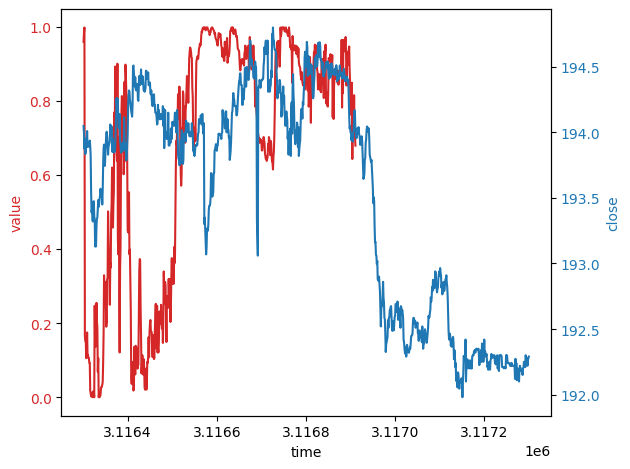

In [13]:
# Plot the value column and the close column for the last 1000 values on a dual axis plot
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('value', color=color)
ax1.plot(df['value'].tail(1000), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('close', color=color)  # we already handled the x-label with ax1
ax2.plot(df['close'].tail(1000), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped